## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes 
# as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [8]:
# Read the dataset.
df = pd.read_csv('ab_data.csv')

# Inspect the dataset.
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [9]:
# Use the shape function to see the number of (rows, colums) in the dataset.
num_rows = df.shape[0]
print("Number of rows: {}.".format(num_rows))

Number of rows: 294478.


c. The number of unique users in the dataset.

In [10]:
# Use the nunique () function.
num_users = df.nunique().user_id
print("Number of unique users: {}.".format(num_users))

Number of unique users: 290584.


d. The proportion of users converted.

In [11]:
# Find the proportion of users converted by taking the mean since all the values are 1 or 0.
prop_users_coverted = df['converted'].mean()
print("The proportion of converted users is {}%.".format(round(prop_users_coverted, 4)*100))

The proportion of converted users is 11.97%.


e. The number of times the `new_page` and `treatment` don't match.

In [12]:
# Query the dataframe where the group equal treatment and landing_page equal new_page is false.
# And with shape function I can see how many rows. 
mismatches = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
print("Number of times new_page and treatment don't line up: {}.".format(mismatches))

Number of times new_page and treatment don't line up: 3893.


f. Do any of the rows have missing values?

In [13]:
# Check the number of missing values in each row using the isnull function and adding the values.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There are **no missing** values in the dataset.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
# Remove the rows where treatment doesn't match with mew_page or control doesn't match with old_page.
# Get the index names.
indexNames = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index
 
# Delete these row indexes from dataFrame with drop function and store the data in a new dataframe.
df2 = df.drop(indexNames , inplace=False)

# Check the shape for the new dataframe. 
df2.shape

(290585, 5)

In [15]:
# Double check all of the correct rows were removed - this should be 0.
mismatches2 = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
print("Number of times new_page and treatment don't line up after dropping the rows: {}.".format(mismatches2))

Number of times new_page and treatment don't line up after dropping the rows: 0.


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
# Check the number of unique users in df2 as I did for df.
num_users2 = df2.nunique().user_id
print("Number of unique users in df2: {}.".format(num_users2))

Number of unique users in df2: 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
# Check which is the duplicated user_id.
duplicate_id = df2[df2["user_id"].duplicated()]['user_id'].values[0]
print("The duplicate user_id is: {}.".format(duplicate_id))

The duplicate user_id is: 773192.


c. What is the row information for the repeat **user_id**? 

In [18]:
# Investigate the row details for the duplicated user_id.
df2[df2["user_id"] == duplicate_id]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
# Delete one of the duplicate rows, I decide to keep the first one.
df2.drop_duplicates(subset ="user_id", 
                     keep = 'first', inplace = True) 

In [20]:
# Check again the row details for the duplicate user_id to verify I deleted one entry.
df2[df2["user_id"] == duplicate_id]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
# Since converted values are 1 and 0, I can calculate the mean to get the probability of an individual converting.
converted_mean = df2['converted'].mean()
print("The probability of an individual converting is {}%.".format(round(converted_mean, 4)*100))

The probability of an individual converting is 11.959999999999999%.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
# Calculate the mean but this time using the control group as well.
control_converted_mean = df2[df2['group'] == "control"]['converted'].mean()
print("The probability of a control converting is {}%.".format(round(control_converted_mean, 4)*100))

The probability of a control converting is 12.04%.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
# Same but for treatment group.
treatment_converted_mean = df2[df2['group'] == "treatment"]['converted'].mean()
print("The probability of a treatment converting is {}%.".format(round(treatment_converted_mean, 4)*100))

The probability of a treatment converting is 11.88%.


d. What is the probability that an individual received the new page?

In [29]:
# Calculate the mean for the new_page.
new_page_mean = (df2.landing_page == "new_page").mean()
print("The probability that an individual received the new_page is {}%.".format(round(new_page_mean, 4)*100))

The probability that an individual received the new_page is 50.01%.


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**SUMMARY RESULTS**  

* Given that an individual was in the control group, the probability they converted is 0.1204.  
* Given that an individual was in the treatment group, the probability they converted is 0.1188.
* The probalibility that an individual received the new page, indenpendently of the group they belong is 0.5001.

**CONCLUSIONS**  

The control group (the group with the old page) converted at a higher rate than the teatment group (the group with the new page):

control_converted_mean > treatment_converted_mean

However, the magnitude of this change is very small. With these numbers we can confirm that there is not enough evidence to say that the new page leads to more conversions. 

Finally, the probability that an individual recieved the old or the new page is well balanced (roughly 0.5). This means that it is not possible to be a difference in conversion based on being given more opportunities to do so. Therefore, we don't need to run the experiment longer. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0 : P_{new} - P_{old} <= 0$$  
$$H_1 : P_{new} - P_{old} > 0 $$  

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [30]:
# As before we calculate the convertion rate using the mean function.
p_new = df2.converted.mean()
print("The convertion rate for p_new is {}%.".format(round(p_new, 6)*100))

The convertion rate for p_new is 11.9597%.


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [31]:
p_old = p_new
print("The convertion rate for p_old is {}%".format(round(p_old, 6)*100))

The convertion rate for p_old is 11.9597%


c. What is $n_{new}$, the number of individuals in the treatment group?

In [32]:
# I need to count the number of rows for treatment group.
n_new = df2.query('group == "treatment"').shape[0]
print("The number of individuals in the treatment group is {}.".format(n_new))

The number of individuals in the treatment group is 145310.


d. What is $n_{old}$, the number of individuals in the control group?

In [33]:
# Same as section before but for control group.
n_old = df2.query('group == "control"').shape[0]
print("The number of individuals in the treatment group is {}.".format(n_old))

The number of individuals in the treatment group is 145274.


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
# I am going to use the random choice from numpies using the parameters I calculated in the sections above for the n_new trasactions.
new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new), p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
# Same for the n_old transactions.
old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old), p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
# For being able of finding the difference I need to calculate the mean of each array.
p_diff = new_page_converted.mean() - old_page_converted.mean()
print("The p difference is {}.".format(round(p_diff, 8)))

The p difference is -0.00157838.


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [37]:
# Same as above but 10000 times and store the results in a new array.
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new), p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old), p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

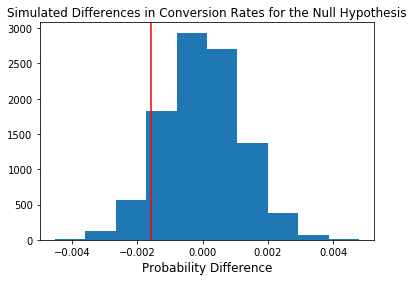

In [38]:
p_diffs = np.asarray(p_diffs)
obs_diff = treatment_converted_mean - control_converted_mean

# Plot null distribution.
plt.hist(p_diffs)
plt.title("Simulated Differences in Conversion Rates for the Null Hypothesis", fontsize=12)
plt.xlabel("Probability Difference", fontsize=12)
# Plot line for observed statistic.
plt.axvline(obs_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
# Compute p value.
p_value = (p_diffs > obs_diff).mean()
print("The proportion of p_diffs greater than obs_diff is {}.".format(round(p_value, 4)))

The proportion of p_diffs greater than obs_diff is 0.9061.


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**CONCLUSIONS**

The number computed in the part j. is the **p-value**. The p-value is the probability of getting our statistic (or more extreme value in favor of the alternative) if the null hypothesis is true. In our case it is the probability of not observing any difference between convertion rates of control and treatment groups if the null hypothesis is true

In order to reject the null hypothesis, the p-value should be below our α level of 0.05 (agreed level of 5% chance of committing a Type I error if the null is true). We obtanined a p-value of almost 0.91, too high for us to be able to reject the null hypothesis. There is no sufficient evidence to say that there is convertion difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]

print("The number of converted in the control group is {}.".format(convert_old))
print("The number of converted in the treatment group is {}.".format(convert_new))
print("The number of rows for the controls is {}.".format(n_old))
print("The number of rows for the treatments is {}.".format(n_new))

The number of converted in the control group is 17489.
The number of converted in the treatment group is 17264.
The number of rows for the controls is 145274.
The number of rows for the treatments is 145310.


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print("z-score: {}, p_value: {}".format(z_score, p_value))

z-score: 1.3109241984234394, p_value: 0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [42]:
from scipy.stats import norm

# Tells us how significant our z-score is:
print(norm.cdf(z_score))

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


**CONCLUSIONS**

The z-score is 1.31 which is less than the critical value of 1.64, we fail to reject the null hypothesis. We agree with our findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

Since we are dealing with binary output, each row is either converted or not converted, we will be performing logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
# Add intercept column.
df2['intercept'] =1

# Generate dummy values for the group treatment and store the values in a new column.
# Generate dummy values only for one of the groups because this we just need one for our analysis.
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
import statsmodels.api as sm

# Compute the logistic regression model. 
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
# Calculate the results fitting the model and show the summary data. 
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-04-14 17:13 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**ANSWER**

Hypothesis associated with the regression model:

$$H_0 : P_{new} - P_{old} = 0$$  
$$H_1 : P_{new} - P_{old} != 0 $$ 

The logistic regression determines only two possible outcomes (two-tailed test). If the new page is equal to the old page or different.

The p-value associated with ab_page column is 0.19 which is lower than the p-value calculated using the z-score function. It is different from part II because in part II the alternative hypothesis is that the new page is better than the old page while here the alternative hyothesis is that the new page performs differently than the old page, but not necessarily better.

A p-value 0.190 is still greater then 0.05 (our $\alpha$), so we still cannot reject our null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**ANSWER**

Possible factors that can influence whether or not an individual converts:  

* The timestamp metric to determine in which part of the day the individuals converted the most. For example, if we find that the evening is the period that users spend most of their time on the internet we might also take it into consideration.

* The type of products they are selling. If there are products for females, the male users visiting the site will most likely not buy the product even if the new page is better than the old one. 

* Factors like age, profession, prior academic background, nationality, gender or specific cultural behavior could also contribute to the conversion rate. 

* These are limitations which should be at least kept in mind while making the final decision.
    

When multiple factors are considered, if they are correlated with one another (known as multicollinearity) the expected relationship between x-variables and the response may not hold. Therefore, it can influence the result accuracy.

And our hypothesis testing results may not be reliable. Therefore, a particular variable might be useful for predicting the response, but because of the relationship it has with other x-variables, we will no longer see the association. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
# Read the new data set for countries and join it with my previous dataframe using user_id as index.
df_countries = pd.read_csv('countries.csv')
df2 = df2.set_index('user_id').join(df_countries.set_index('user_id'))
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [47]:
# Check which countries are in the new dataset.
df2.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [48]:
# There are 3 different countries, so I need to generate dummy values for 2 of them.
df2[['UK', 'US']] = pd.get_dummies(df2['country'])[['UK', 'US']]
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


In [49]:
# Train the model.
logit_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page','US', 'UK']])

In [50]:
# Fit the logistic linear model and obtain the results
results2 = logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2020-04-14 17:13 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

**ANSWER**  

The p-values for the countries are above 0.05, so again we cannot reject the null hypothesis. Countries do not influence significantly differences in the conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
df2['UK_page'] = df2['UK'] * df2['ab_page']
df2['US_page'] = df2['US'] * df2['ab_page']
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,UK_page,US_page
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


In [52]:
# Train the model.
logit_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page','US', 'UK', 'UK_page', 'US_page']])

In [53]:
# Fit the logistic linear model and obtain the results.
results3 = logit_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2020-04-14 17:13 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
UK_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

**CONCLUSIONS**

Looking at p-values for all variables (all higher than 0.05) we can say that interactions between page and country have no significant effects on conversion.

From the regression above we see that the p-value is higher in UK than in US, which means that users in the UK are more likely to convert, but still not enough evidence to reject the null hypothesis.

After all the tests being done we can accept the Null Hypothesis (and reject the Alternate Hypothesis) and keep the existing page as it is.
    
These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0